<a href="https://colab.research.google.com/github/ceabrett/tf_course/blob/master/w1_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting whether a light is on or off

I have collected the data for one of my lights over a period of about 2 months. In this exercise we will train a tensorflow model to predict the state of the light from the following featuers:
* hour of the day
* day of the week
* minutes since the last state change in the home (log scaled)
* miuntes since the last utterance in the home (log scaled)
* the elevation of the sun (scaled between -1 and -1)

**Exercise 1:** Which of these features would you expect to be the most important? Can you think of any other features that would help.

In [0]:
# import some modules that we will use in the notebook
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [15]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,), activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()

xs = np.array([-1.0, 2.0, -3.0, 4.0, -5.0, 6.0], dtype=float)
ys = np.array([[0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0]], dtype=float)

model.fit(xs, ys, epochs=100)

print(model.predict([-2, 2]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 1s 93ms/sample - loss: 0.9498
Epoch 2/100
6/6 [==============================] - 0s 986us/sample - loss: 0.9478
Epoch 3/100
6/6 [==============================] - 0s 400us/sample - loss: 0.9457
Epoch 4/100
6/6 [==============================] - 0s 530us/sample - loss: 0.9437
Epoch 5/100
6/6 [==============================] - 0s 371us/sample - loss: 0.9416
Epoch 6/100
6/6 [==============================] - 0s 531us/sample - loss: 0.9396
Epoch 7/100
6/6 [==============================] - 0s

In [111]:
# make the dataset accessible to this notebook
!git clone https://github.com/ceabrett/tf_course.git

# load the dataset into a pandas dataframe and show the beginning of the dataset
df = pd.read_csv("tf_course/data.csv")
df.head()

# load sample dataset
on_indices = df[df.state == 1].index
off_indices = df[df.state == 0].index
sampled_off_indices = np.random.choice(off_indices, len(on_indices), replace=False)
sampled_indices = np.concatenate([on_indices, sampled_off_indices])
np.random.shuffle(sampled_indices)
df = df.loc[sampled_indices]

# state is 0 when the light is off and 1 when it is on

fatal: destination path 'tf_course' already exists and is not an empty directory.


In [110]:
# some summary statistics about the data
df.describe()

,dow_f,hour_f,log_mins_since_any_onoff,log_mins_since_utt,mean_onoff_state,state,sun_elevation
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.00000,3142.000000
mean,3.577667,13.069621,4.382643,5.197387,0.293371,0.50000,-0.155993
std,2.019470,6.594592,1.308520,1.277424,0.189625,0.50008,0.311357
min,0.000000,0.000000,0.011682,0.021452,0.000000,0.00000,-0.730116
25%,1.794271,8.000000,3.654309,4.521528,0.142857,0.00000,-0.435663
50%,3.677083,14.000000,4.617458,5.411494,0.285714,0.50000,-0.116016
75%,5.372396,18.500000,5.358580,6.100665,0.400000,1.00000,0.127083
max,6.989583,23.750000,7.548921,8.006151,0.800000,1.00000,0.344547


We want to predict "state" using everything else as a feature, so lets seperate them. Tensorflow expects us to pass the features and the label to the modeling training function seperately.

In [0]:
# feat_names = [feat_name for feat_name in df.columns if feat_name != "state"]
feat_names = ["hour_f"]
feats = df[feat_names]
label = df["state"]

# tensorflow is expecting the features vector to be a 2 dimensional array, not a pandas dataframe. But we can get the underlying array with .values
xs = feats.values

ys = label.values
from keras.utils import np_utils
ys_cat = np_utils.to_categorical(label.values, 2)

In [51]:
# Now lets train a tensorflow model. Recall the example from this week's lectures
# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# model.compile(optimizer='sgd', loss='mean_squared_error')
# print(model.summary())
# xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
# ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
# model.fit(xs, ys, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
6/6 [==============================] - 1s 123ms/sample - loss: 37.9560
Epoch 2/10
6/6 [==============================] - 0s 822us/sample - loss: 30.2085
Epoch 3/10
6/6 [==============================] - 0s 692us/sample - loss: 24.1061
Epoch 4/10
6/6 [==============================] - 0s 254us/sample - loss: 19.2980
Epoch 5/10
6/6 [==============================] - 0s 272us/sample - loss: 15.5084
Epoch 6/10
6/6 [==============================] - 0s 253us/sample - loss: 12.5203
Epoch 7/10
6/6 [==============================] - 0s 276us/sample - loss: 10.1628
Epoch 8/10
6/6 [==============================] - 0s 264us/sample - loss: 8.3016
Epoch 9/10
6/6 [

Adapt this piece of code for our new problem

In [100]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(units=10, input_shape=[1], activation="relu"))
model.add(keras.layers.Dense(units=1))
print(model.summary())
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xs, ys, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5953/5953 [==============================] - 2s 349us/sample - loss: 1.2219
Epoch 2/10
5953/5953 [==============================] - 0s 41us/sample - loss: 0.1726
Epoch 3/10
5953/5953 [==============================] - 0s 40us/sample - loss: 0.1713
Epoch 4/10
5953/5953 [==============================] - 0s 41us/sample - loss: 0.1700
Epoch 5/10
5953/5953 [==============================] - 0s 40us/sample - loss: 0.1696
Epoch 6/10
5953/5953 [==============================] - 0s 41us/sample - loss: 0.1686
Epoch 7/10
5953/5953

In [124]:
import matplotlib.pyplot as plt

def plot(hours, model):
  #hours = range(23)
  preds = model.predict(hours)
  print("preds = %s" % preds)
  plt.plot(hours, preds[:, -1])
  
plot(range(23), model)

ValueError: ignored

[[-9.97858923e-01 -6.54031292e-02]
 [-2.58819045e-01 -9.65925826e-01]
 [ 1.30526192e-01  9.91444861e-01]
 ...
 [-9.46930129e-01 -3.21439465e-01]
 [ 5.55570233e-01 -8.31469612e-01]
 [-1.00000000e+00  1.22464680e-16]]
Epoch 1/10
3142/3142 [==============================] - 1s 255us/sample - loss: 0.6651 - acc: 0.6862
Epoch 2/10
3142/3142 [==============================] - 0s 95us/sample - loss: 0.6266 - acc: 0.7091
Epoch 3/10
3142/3142 [==============================] - 0s 96us/sample - loss: 0.5964 - acc: 0.7056
Epoch 4/10
3142/3142 [==============================] - 0s 91us/sample - loss: 0.5715 - acc: 0.7081
Epoch 5/10
3142/3142 [==============================] - 0s 92us/sample - loss: 0.5534 - acc: 0.7069
Epoch 6/10
3142/3142 [==============================] - 0s 94us/sample - loss: 0.5398 - acc: 0.7097
Epoch 7/10
3142/3142 [==============================] - 0s 92us/sample - loss: 0.5314 - acc: 0.7104
Epoch 8/10
3142/3142 [==============================] - 0s 92us/sample - loss: 0.52

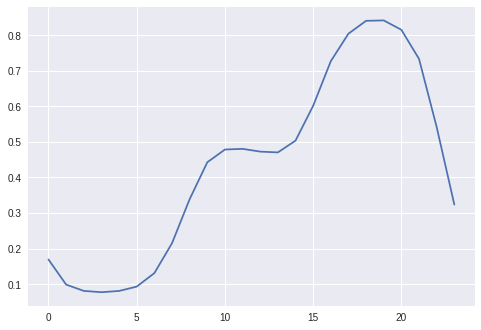

In [135]:

model = keras.models.Sequential()
model.add(keras.layers.Dense(128, input_shape=(2,), activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(2,  # output dim is 2, one score per each class
                activation='softmax'))  # input dimension = number of features your data has
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def cyclic_transform(val, base):
    cos_val = np.cos((2 * math.pi * val) / float(base))
    sin_val = np.sin((2 * math.pi * val) / float(base))
    return np.concatenate([cos_val, sin_val], axis=1)
xs_mod = cyclic_transform(xs, 24)
print(xs_mod)
model.fit(cyclic_transform(xs, 24), ys_cat, epochs=10)
hours = np.array([[h] for h in range(24)])
preds = model.predict(cyclic_transform(hours, 24))
plt.plot(range(24), preds[:, -1])

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=2, input_shape=[6], activation="softmax")])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(xs, ys, epochs=20)

Solution: Change the input dimension, the output dimension, and the loss function

The loss function is not very imformative so add the metrics=["accuracy"] argument to the compile function.

In [0]:
# get files from the repository
!git clone https://github.com/ceabrett/tf_course.git
from tf_course.helper import load_dataset_light


In [5]:
# get the datasets
feats_train, feats_test, label_train, label_test = load_dataset_light()


# df = pd.read_csv("https://raw.githubusercontent.com/ceabrett/tf_course/master/data.csv")  

feats_train, feats_test, label_train, label_test = load_dataset_light()
# import pandas as pd
# df = pd.read_csv("tf_course/data.csv")
# df.head()  # show the beginning of the dataset
feats_train.head()

,dow_f,hour_f,log_mins_since_any_onoff,log_mins_since_utt,sun_elevation
972,6.791667,19.00,5.079546,5.080133,-0.275184
3217,2.177083,4.25,5.675765,5.645873,-0.392480
4428,0.791667,19.00,4.427650,4.428381,-0.199936
4895,5.656250,15.75,2.758081,6.249843,0.148749
5124,1.041667,1.00,5.294562,5.295060,-0.614804


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [62]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
model.fit(xs, ys, epochs=1000)
print(model.predict([7, 16]))

Epoch 1/1000
6/6 [==============================] - 1s 162ms/sample - loss: 69.4616
Epoch 2/1000
6/6 [==============================] - 0s 736us/sample - loss: 32.1490
Epoch 3/1000
6/6 [==============================] - 0s 379us/sample - loss: 14.8796
Epoch 4/1000
6/6 [==============================] - 0s 324us/sample - loss: 6.8868
Epoch 5/1000
6/6 [==============================] - 0s 376us/sample - loss: 3.1875
Epoch 6/1000
6/6 [==============================] - 0s 286us/sample - loss: 1.4753
Epoch 7/1000
6/6 [==============================] - 0s 409us/sample - loss: 0.6829
Epoch 8/1000
6/6 [==============================] - 0s 467us/sample - loss: 0.3161
Epoch 9/1000
6/6 [==============================] - 0s 478us/sample - loss: 0.1464
Epoch 10/1000
6/6 [==============================] - 0s 571us/sample - loss: 0.0678
Epoch 11/1000
6/6 [==============================] - 0s 364us/sample - loss: 0.0314
Epoch 12/1000
6/6 [==============================] - 0s 252us/sample - loss: 0.014

In [1]:
!git clone https://github.com/ceabrett/tf_course.git

Cloning into 'tf_course'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 20 (delta 5), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (20/20), done.


hello
